# Random Forest Project

For this project we will be exploring publicly available data from https://www.lendingclub.com/info/download-data.action. Lending Club connects people who need money (borrowers) with people who have money (investors). For more basic information about the company please check out the wikipedia article about the company. https://en.wikipedia.org/wiki/Lending_Club

In [1]:
# Import our libraries we are going to use for our data analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dataset downloaded from kaggle: https://www.kaggle.com/wendykan/lending-club-loan-data

In [4]:
df = pd.read_csv('loan.csv')
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [5]:
#Let's see the data shape and NaN values
print(df.shape)
#print(df.isnull().sum().value_counts())

(887379, 74)


In [6]:
#df.count()
#let us remove columns with 70% or more NAN values
nulls = [i for i in df.count()<887379*0.3]
df.drop(df.columns[nulls],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 54 columns):
id                            887379 non-null int64
member_id                     887379 non-null int64
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null object
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_title                     835917 non-null object
emp_length                    842554 non-null object
home_ownership                887379 non-null object
annual_inc                    887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
loan_status                   887379 

# Some Visualization

Text(0.5, 1.0, 'Interest Rate')

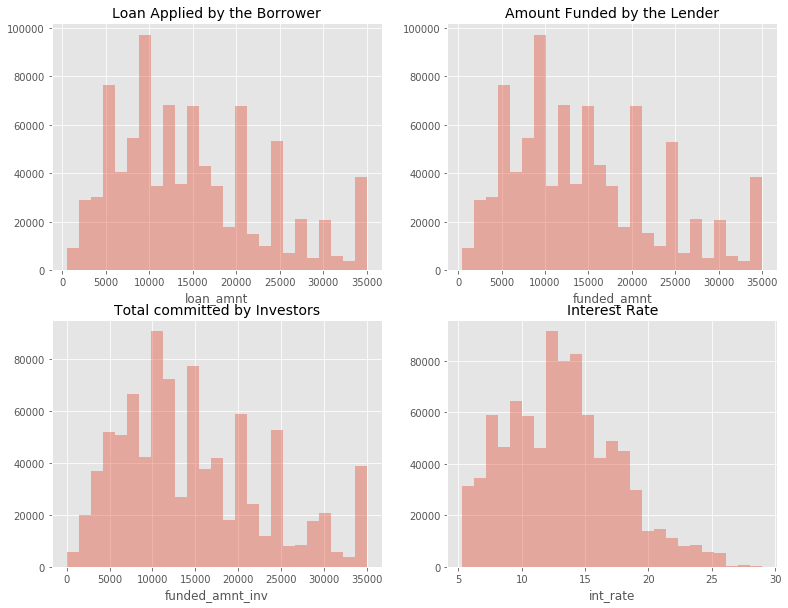

In [32]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(13,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)



sns.distplot(df['loan_amnt'], ax=ax1, kde=False, bins=25)
ax1.set_title("Loan Applied by the Borrower",fontsize=14)
sns.distplot(df['funded_amnt'], ax=ax2, kde=False, bins=25)
ax2.set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(df['funded_amnt_inv'], ax=ax3, kde=False, bins=25)
ax3.set_title("Total committed by Investors", fontsize=14)
sns.distplot(df['int_rate'], ax=ax4, kde=False, bins=25)
ax4.set_title("Interest Rate", fontsize=14)

Text(0, 0.5, 'Loan Funded')

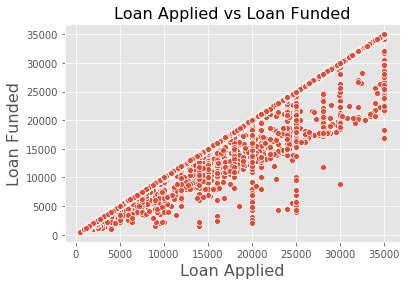

In [33]:
#plt.figure(figsize=(5,5))
sns.scatterplot(x='loan_amnt', y='funded_amnt', data=df)
plt.title('Loan Applied vs Loan Funded', fontsize=16)
plt.xlabel('Loan Applied', fontsize=16)
plt.ylabel('Loan Funded', fontsize=16)

Text(0.5, 0, 'Annual Income')

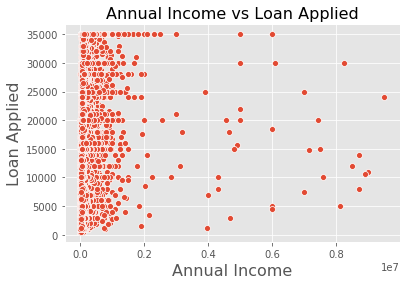

In [34]:
#plt.figure(figsize=(5,5))
sns.scatterplot(y='loan_amnt', x='annual_inc', data=df)
plt.title('Annual Income vs Loan Applied', fontsize=16)
plt.ylabel('Loan Applied', fontsize=16)
plt.xlabel('Annual Income', fontsize=16)

Many low  annual income people applied for loan than high income people.

Text(0.5, 0, 'Annual Income')

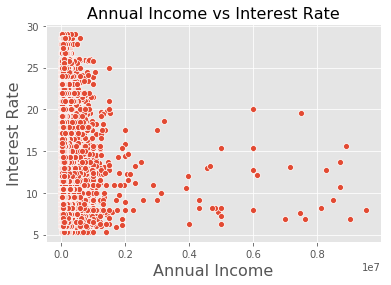

In [35]:
#plt.figure(figsize=(5,5))
sns.scatterplot(y='int_rate', x='annual_inc', data=df)
plt.title('Annual Income vs Interest Rate', fontsize=16)
plt.ylabel('Interest Rate', fontsize=16)
plt.xlabel('Annual Income', fontsize=16)

In [36]:
#Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'

Text(0, 0.5, 'Interest Rate')

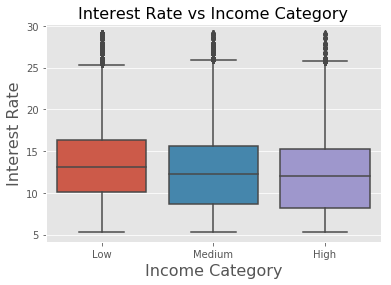

In [37]:
#plt.figure(figsize=(12,8))
sns.boxplot(x='income_category', y='int_rate', data=df)
plt.title('Interest Rate vs Income Category', fontsize=16)
plt.xlabel('Income Category', fontsize=16)
plt.ylabel('Interest Rate', fontsize=16)

Is there any relation between loan amount and interest rate?

In [38]:
df['loan_amnt_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['loan_amnt'] <= 10000, 'loan_amnt_category'] = 'below_10k'
    col.loc[(col['annual_inc'] > 10000) & (col['annual_inc'] <= 20000), 'loan_amnt_category'] = 'from_10k_to_20k'
    col.loc[(col['annual_inc'] > 20000) & (col['annual_inc'] <= 30000), 'loan_amnt_category'] = 'from_20k_to_30k'
    col.loc[col['annual_inc'] > 30000, 'loan_amnt_category'] = 'above_30k'

Text(0, 0.5, 'Interest Rate')

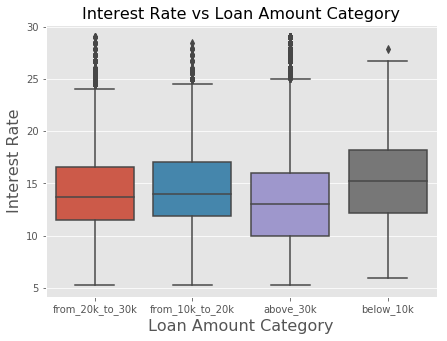

In [43]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_amnt_category', y='int_rate', data=df)
plt.title('Interest Rate vs Loan Amount Category', fontsize=16)
plt.xlabel('Loan Amount Category', fontsize=16)
plt.ylabel('Interest Rate', fontsize=16)

In [44]:
#Now lets concetrate on the isuue dates/years
df['issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [45]:
df['year'] = pd.to_datetime(df['issue_d']).dt.year

In [46]:
df['month'] = pd.to_datetime(df['issue_d']).dt.month

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


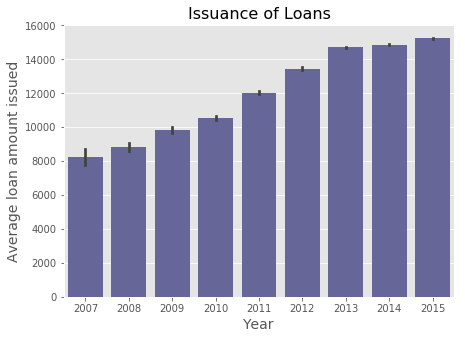

In [64]:
plt.figure(figsize=(7,5))
sns.barplot(x = df['year'], y = df['loan_amnt'],color='b',saturation=0.2)
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)
plt.show()

Highest loan was issued in 2015. 

In [49]:
#Let us check now the loan status
#df['loan_status'].unique()
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Text(0.5, 0, 'Counts')

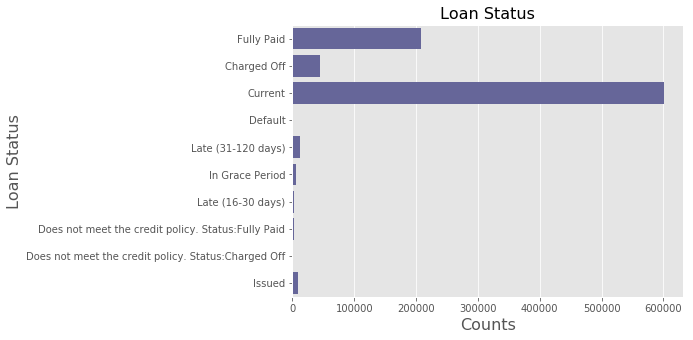

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(y=df['loan_status'],color='b',saturation=0.2)
plt.title('Loan Status', fontsize=16)
plt.ylabel('Loan Status', fontsize=16)
plt.xlabel('Counts', fontsize=16)

Let us define good loan with following categories  (1) Fully Paid,  (2) Does not meet the credit policy. Status:Fully Paid,  (3) Issued, and (4) current

In [58]:
df['loan_category']=np.nan

def loancategory(x):
    if x in ['Fully Paid', 'Issued', 'Current', 'Does not meet the credit policy. Status:Fully Paid']:
        return 'GOOD'
    else:
        return 'BAD'
    
df['loan_category'] = df['loan_status'].apply(loancategory)

In [59]:
df['loan_category'].value_counts()

GOOD    819950
BAD      67429
Name: loan_category, dtype: int64

Text(0.5, 1.0, 'Loan Category')

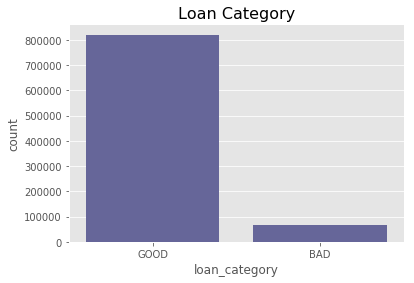

In [62]:
#plt.figure(figsize=(6,4))
sns.countplot(df['loan_category'],color='b',saturation=0.2)
plt.title('Loan Category', fontsize=16)

In [65]:
  67429/(  67429+819950)*100 

7.598669790472842

Only 7.6% are bad loans! But good loans category also include 'Current', which in future has the risk to become bad loans. 

Text(0.5, 1.0, 'Yearly Loan Category')

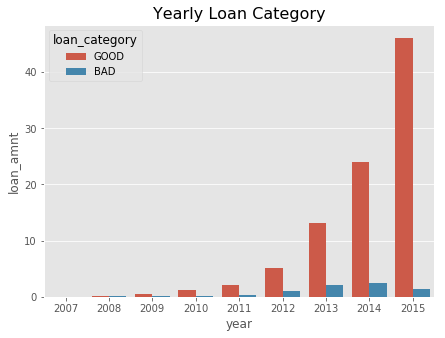

In [68]:
#year wise loan category
plt.figure(figsize=(7,5))
sns.barplot(x='year', y='loan_amnt', data=df, hue='loan_category', estimator=lambda x: len(x) / len(df) * 100)
plt.title('Yearly Loan Category', fontsize=16)

Text(0.5, 1.0, 'Yearly Loan Amount')

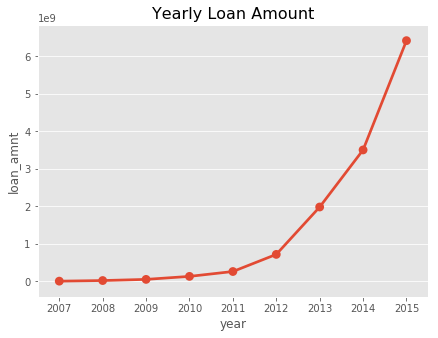

In [71]:
#year wise loan category
plt.figure(figsize=(7,5))
sns.pointplot(x='year', y='loan_amnt', data=df,estimator=lambda y: sum(y))
plt.title('Yearly Loan Amount', fontsize=16)

Text(0.5, 1.0, 'Yearly Loan processed')

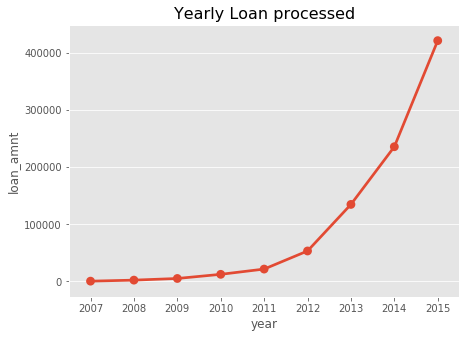

In [70]:
#year wise loan category
plt.figure(figsize=(7,5))
sns.pointplot(x='year', y=df['loan_amnt'], data=df,estimator=lambda y: len(y))
plt.title('Yearly Loan processed', fontsize=16)

Loan Amount Distribution by Month

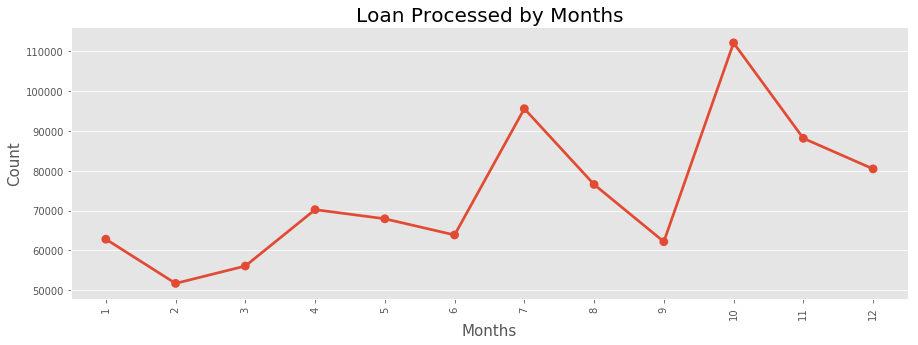

In [77]:
plt.figure(figsize=(15,5))
g = sns.pointplot(x='month',y='loan_amnt',data=df,estimator=lambda y: len(y))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Processed by Months", fontsize=20)
#plt.legend(loc=1)
plt.show()

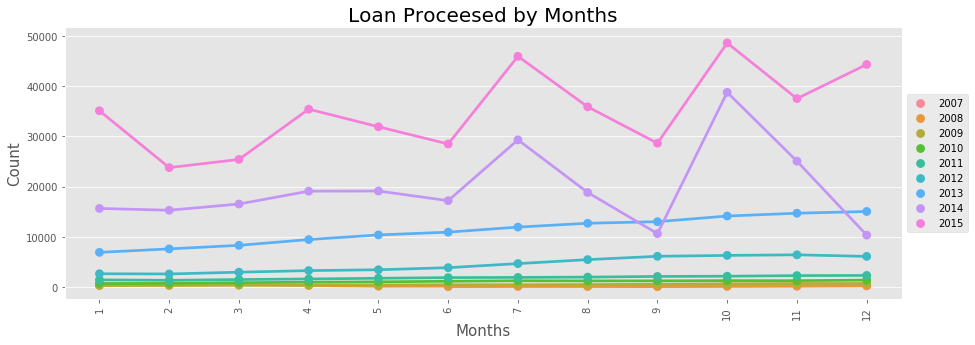

In [79]:
plt.figure(figsize=(15,5))
g = sns.pointplot(x='month',y='loan_amnt',data=df,hue='year',estimator=lambda y: len(y))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Proceesed by Months", fontsize=20)

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc=0)
plt.show()

Latter after the visualtion, we will be using Fully Paid as 'GOOD' and Default or Charged Off as 'BAD' for Machine Learning Part. It will give us better model power. For the time beging Let concetrate on other visualiztion part.

Let us visualize some other variables:

Term: This is the number of payments on the loan. There are two terms (36 months and 60 months) on which loans are given. Around 80% of the loans are given on 36 months term.

Grade: LC assign grades from A - G to each Note that reflects thier assessment of the risk.

Text(0.5, 1.0, 'Loan Grade')

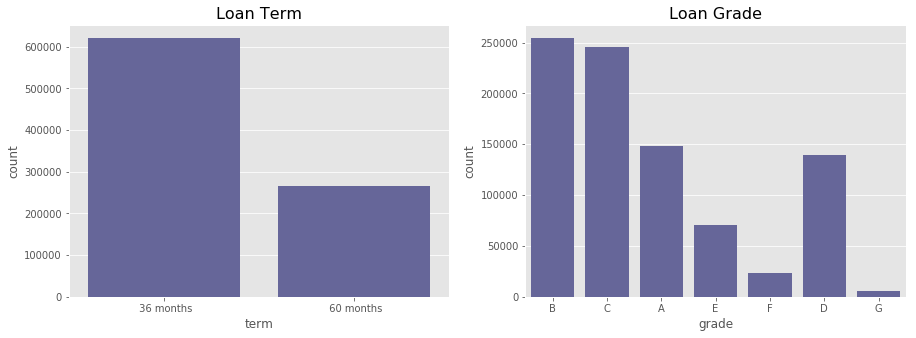

In [80]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

#plt.figure(figsize=(6,4))
sns.countplot(df['term'], ax=ax[0],color='b',saturation=0.2 )
ax[0].set_title('Loan Term', fontsize=16)

sns.countplot(df['grade'], ax=ax[1],color='b',saturation=0.2)
ax[1].set_title('Loan Grade', fontsize=16)

Lets now check whether there is a relation between 'Grade' and the interest Rate. (Should be lower interest rate for better grade.)

Text(0, 0.5, 'Interest Rate')

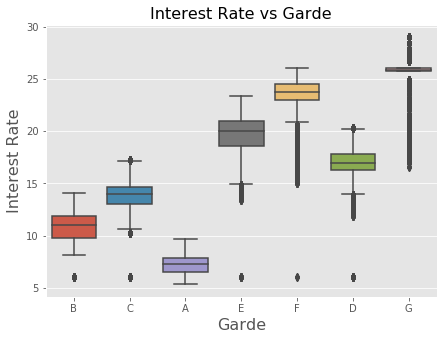

In [82]:
plt.figure(figsize=(7,5))
sns.boxplot(x='grade', y='int_rate', data=df)
plt.title('Interest Rate vs Garde', fontsize=16)
plt.xlabel('Garde', fontsize=16)
plt.ylabel('Interest Rate', fontsize=16)

Lets see the loand amont vs grade and interest rate vs grade in each year.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Interest Rate')

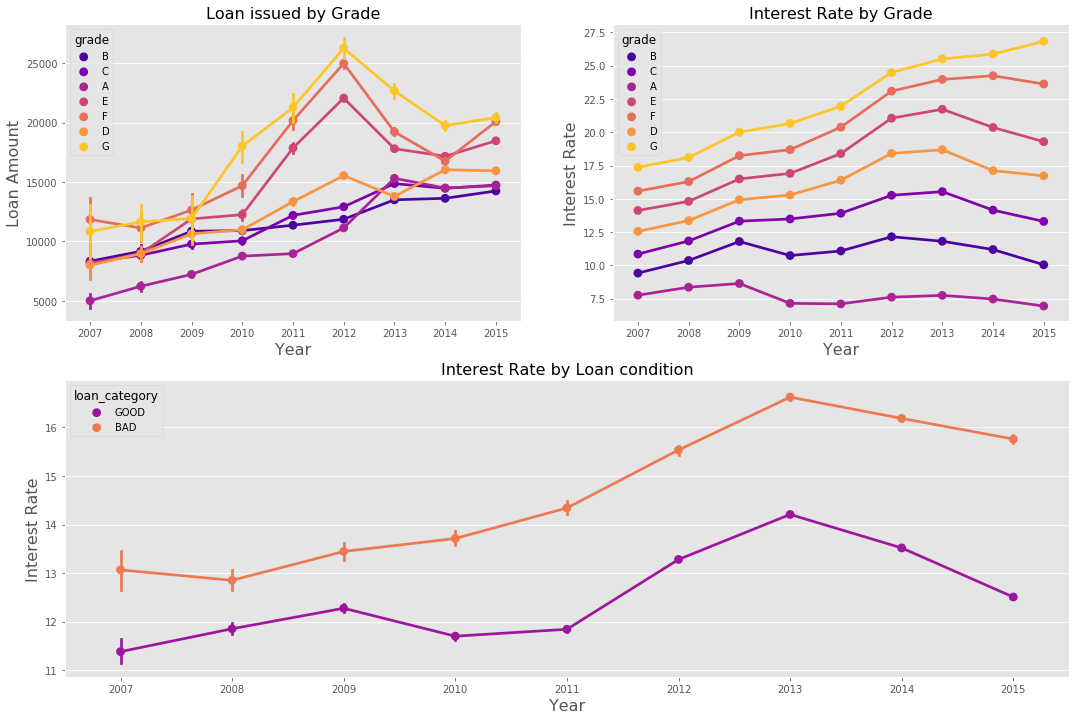

In [85]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

#plt.figure(figsize=(6,4))
sns.pointplot(y=df['loan_amnt'], x=df['year'], hue=df['grade'], ax=ax1,palette='plasma')
ax1.set_title('Loan issued by Grade', fontsize=16)
ax1.set_xlabel('Year',fontsize=16)
ax1.set_ylabel('Loan Amount',fontsize=16)



sns.pointplot(y=df['int_rate'], x=df['year'], hue=df['grade'], ax=ax2,palette='plasma')
ax2.set_title('Interest Rate by Grade', fontsize=16)
ax2.set_xlabel('Year',fontsize=16)
ax2.set_ylabel('Interest Rate',fontsize=16)

sns.pointplot(y=df['int_rate'], x=df['year'], hue=df['loan_category'], ax=ax3,palette='plasma')
ax3.set_title('Interest Rate by Loan condition', fontsize=16)
ax3.set_xlabel('Year',fontsize=16)
ax3.set_ylabel('Interest Rate',fontsize=16)

Employment Length: Distribution of employment length.

Text(0.5, 0, 'Counts')

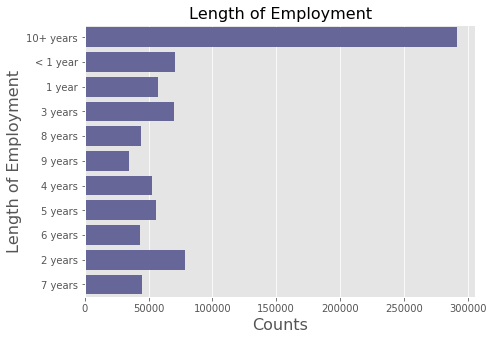

In [86]:
plt.figure(figsize=(7,5))
sns.countplot(y=df['emp_length'],orient='h',color='b',saturation=0.2)
plt.title('Length of Employment', fontsize=16)
plt.ylabel('Length of Employment', fontsize=16)
plt.xlabel('Counts', fontsize=16)

  Purpose of Loan. Debt of consolidation is major reason of applying Loan.

Text(0.5, 0, 'Counts')

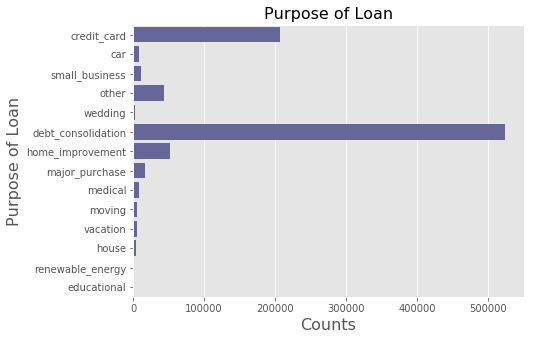

In [88]:
plt.figure(figsize=(7,5))
sns.countplot(y=df['purpose'],orient='h',color='b',saturation=0.2)
plt.title('Purpose of Loan', fontsize=16)
plt.ylabel('Purpose of Loan', fontsize=16)
plt.xlabel('Counts', fontsize=16)

Home ownership

In [89]:
df['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

Text(0.5, 0, 'Counts')

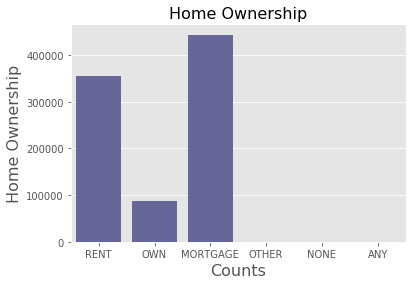

In [91]:
#plt.figure(figsize=(7,5))
sns.countplot(df['home_ownership'],color='b',saturation=0.2)
plt.title('Home Ownership', fontsize=16)
plt.ylabel('Home Ownership', fontsize=16)
plt.xlabel('Counts', fontsize=16)

What's the Employment title of the broower? 

In [92]:
df['emp_title'].value_counts().head(40)

Teacher                     13469
Manager                     11240
Registered Nurse             5525
Owner                        5376
RN                           5355
Supervisor                   4983
Sales                        4212
Project Manager              3988
Driver                       3569
Office Manager               3510
General Manager              3178
Director                     3156
manager                      3138
teacher                      2925
owner                        2849
Engineer                     2671
President                    2598
driver                       2429
Vice President               2351
Attorney                     2136
Operations Manager           2071
Accountant                   2035
Administrative Assistant     2019
Sales Manager                1846
Account Manager              1725
sales                        1724
Police Officer               1720
supervisor                   1675
Executive Assistant          1603
Analyst       

Text(0.5, 0, 'Counts')

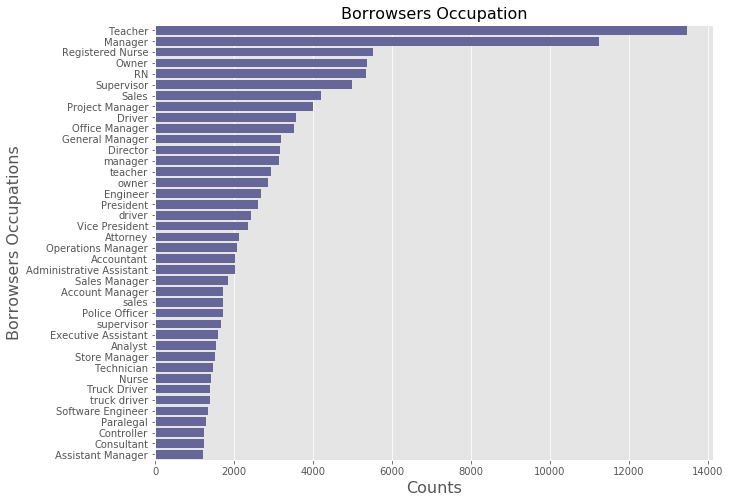

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(x=df.emp_title.value_counts()[:40].values,y=df.emp_title.value_counts()[:40].index.values,orient='h',color='b',saturation=0.2)
plt.title('Borrowsers Occupation', fontsize=16)
plt.ylabel('Borrowsers Occupations', fontsize=16)
plt.xlabel('Counts', fontsize=16)

State-wise loan distribution: CA, NY, TX, FL are the highest issued State.

In [ ]:
fig = plt.figure(figsize=(15,12))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

df_plot_state_status = df.groupby(['addr_state','loan_category']).size()
df_plot_state_status.unstack().plot(kind='barh',stacked=True, grid=False, ax=ax1)
ax1.set_title('State-wise Loan distribution by category', fontsize=16)
ax1.set_xlabel('Conuts', fontsize=14)
ax1.set_ylabel('US State', fontsize=14)

sns.barplot(x='int_rate', y='addr_state', data=df, ax=ax2, color='b',saturation=0.2)
ax2.set_title('State-wise Interest Rate', fontsize=16)
ax2.set_xlabel('Interest Rate', fontsize=14)
ax2.set_ylabel('US State', fontsize=14)


In [95]:
states = df['addr_state'].values.tolist()
avg_loan_amnt = df['loan_amnt'].values.tolist()
avg_int_rate = df['int_rate'].values.tolist()
avg_annual_inc = df['annual_inc'].values.tolist()

In [96]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [97]:
from collections import OrderedDict

metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', avg_loan_amnt),
                            ('interest_rate', avg_int_rate),
                            ('annual_income', avg_annual_inc)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()

,state_codes,issued_loans,interest_rate,annual_income
0,AZ,5000.0,10.65,24000.0
1,GA,2500.0,15.27,30000.0
2,IL,2400.0,15.96,12252.0
3,CA,10000.0,13.49,49200.0
4,OR,3000.0,12.69,80000.0


In [98]:
#to reduce the cpu cost just choosing first 1000 rows
limits = 1000
metrics_df_limits = metrics_df.iloc[0:limits, :]

In [99]:
data = dict(type='choropleth',
            colorscale = 'YlGnBu',
            locations = metrics_df_limits['state_codes'],
            z = metrics_df_limits['issued_loans'],
            locationmode = 'USA-states',
            text = metrics_df_limits['issued_loans'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"State-Wise Loan Issued"}
            ) 

In [100]:
layout = dict(title = 'State-Wise Loan Issued', geo = {'scope':'usa'})

In [101]:
choromap = go.Figure(data = [data],layout = layout)

In [102]:
iplot(choromap)

Machine learning part is in the next notebook.